In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import SimpleImputer


Heart Attack Analysis & Prediction Dataset

<a href="https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?select=heart.csv">Heart Attack</a> dataset includes the attributes listed below. In total, there are 77 samples (i.e. patients) that make up this dataset.

- Age : Age of the patient
- Sex : Sex of the patient
    - Value 0: Female
    - Value 1: Male
- cp : Chest Pain type chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
- trtbps : resting blood pressure (in mm Hg)
- chol : cholestoral in mg/dl fetched via BMI sensor
- fbs : (fasting blood sugar > 120 mg/dl)
    - Value 1: true
    - Value 0: false
- rest_ecg : resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach : maximum heart rate achieved
- pcp : peak cardiac power
- output : target (label) values
    - Value 0: healthy 
    - Value 1: heart condition

In [3]:
heart_df = pd.read_csv("heart.csv")
male_df = heart_df[heart_df["sex"]==1]
heart_df

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,pcp,output
0,63,1,3,145,233,1,0,150,2.3,1
1,37,1,2,130,250,0,1,187,3.5,1
2,41,0,1,130,204,0,0,172,1.4,1
3,56,1,1,120,236,0,1,178,0.8,1
4,57,0,0,120,354,0,1,163,0.6,1
...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,0.2,0
299,45,1,3,110,264,0,1,132,1.2,0
300,68,1,0,144,193,1,1,141,3.4,0
301,57,1,0,130,131,0,1,115,1.2,0


Visualizing Data Relationships:
- Resting Blood Pressure vs. Cholesterol
- Resting Blood Pressure vs. Age
- Resting Blood Pressure vs. Max. Heart Rate Achieved
- Resting Blood Pressure vs. Peak Cardiac Power

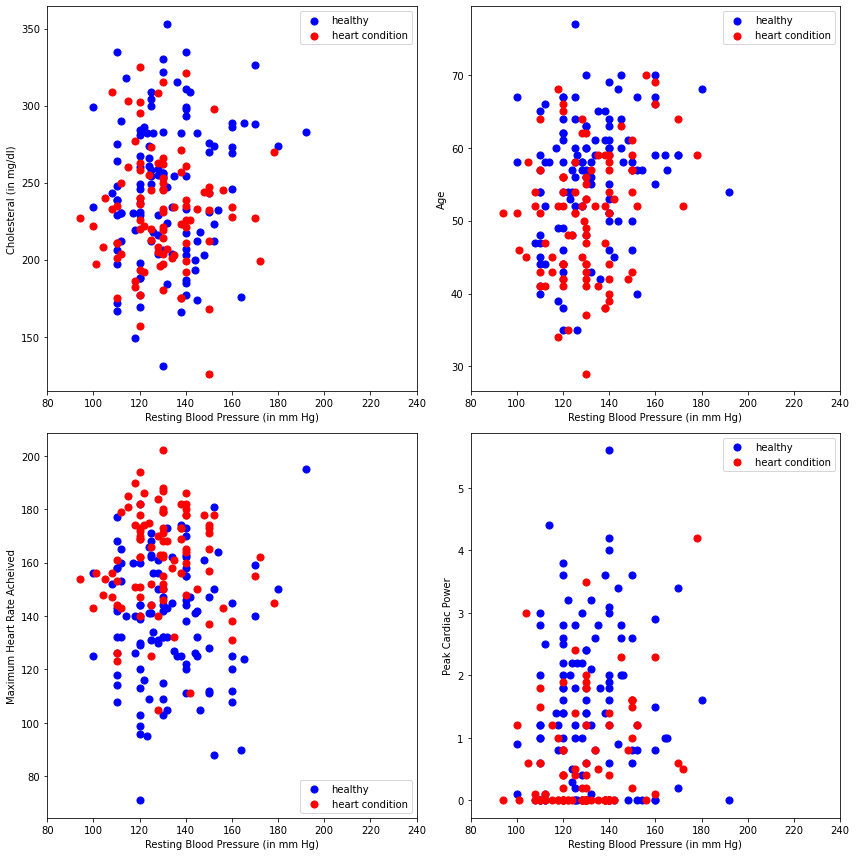

In [4]:
plt.figure( figsize=(12,12), tight_layout=True )

plt.subplot(221)
plt.scatter( "trtbps", "chol", c="blue", data=male_df[ male_df["output"] == 0 ], s=50, label="healthy")
plt.scatter( "trtbps", "chol", c="red", data=male_df[ male_df["output"] == 1 ], s=50, label="heart condition")
plt.xlabel("Resting Blood Pressure (in mm Hg)")
plt.ylabel("Cholesteral (in mg/dl)")
plt.xticks(np.arange(80, 260, step=20))
plt.legend()

plt.subplot(222)
plt.scatter( "trtbps", "age", c="blue", data=male_df[ male_df["output"] == 0 ], s=50, label="healthy")
plt.scatter( "trtbps", "age", c="red", data=male_df[ male_df["output"] == 1 ], s=50, label="heart condition")
plt.xlabel("Resting Blood Pressure (in mm Hg)")
plt.ylabel("Age")
plt.xticks(np.arange(80, 260, step=20))
plt.legend()

plt.subplot(223)
plt.scatter( "trtbps", "thalach", c="blue", data=male_df[ male_df["output"] == 0 ], s=50, label="healthy")
plt.scatter( "trtbps", "thalach", c="red", data=male_df[ male_df["output"] == 1 ], s=50, label="heart condition")
plt.xlabel("Resting Blood Pressure (in mm Hg)")
plt.ylabel("Maximum Heart Rate Acheived")
plt.xticks(np.arange(80, 260, step=20))
plt.legend()

plt.subplot(224)
plt.scatter( "trtbps", "pcp", c="blue", data=male_df[ male_df["output"] == 0 ], s=50, label="healthy")
plt.scatter( "trtbps", "pcp", c="red", data=male_df[ male_df["output"] == 1 ], s=50, label="heart condition")
plt.xlabel("Resting Blood Pressure (in mm Hg)")
plt.ylabel("Peak Cardiac Power")
plt.xticks(np.arange(80, 260, step=20))
plt.legend() 

plt.show()

Three stage pipeline:
- First stage : Imputation (replacement algorithm = mean )
- Second stage: Min/Max scaling (new range [-1, 1] )
- Third stage: Logistic classifier (solver is lbfgs)

Data partitioning assumptions:
- 10 folds
- Random shuffle (True)
- Stratification (True)



In [5]:
pipeline = Pipeline( [ ( "imputer", SimpleImputer() ), 
                       ( "min_max_scaler", MinMaxScaler(feature_range=(-1,1)) ), 
                       ( "logit_classifier", LogisticRegression( solver="lbfgs") ) ] )

kfold = StratifiedKFold( n_splits=10, shuffle=True )

A combined plot that evaluates the classification performance of each pipeline created by the 10-fold cross-validation approach:
- Input data (X): Resting Blood Pressure and Maximum Heart Rate Achieved
- Classification labels (y): output values. 

Assumptions:
- The colors used to generate plots are blue (healthy) and red (heart condition)
- The color of the classification decision line is green.
- The figsize=(15,5)
- Boxplot y-axis ticks are not displayed
- Boxplot x-axis ticks are between 0.5 and 0.9 (inclusive), increments of 0.1.
- Classification plot may use the default x and y-axis tick values (should be between -1 and 1 (inclusive)).
- Decision line will start at Resting Blood Pressure = -1 and end at Resting Blood Pressure = 1 (inclusive), increments of 0.1.


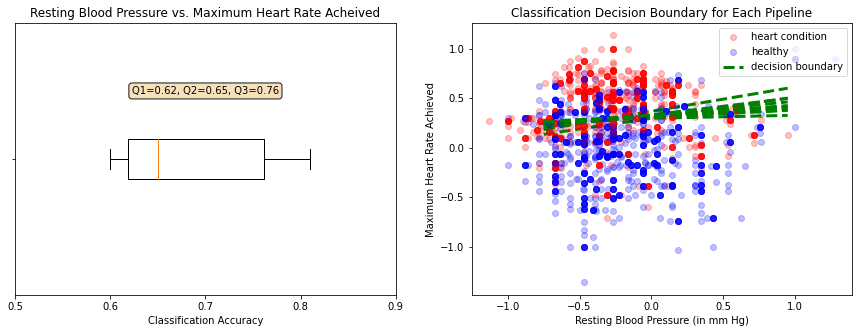

In [11]:
plt.figure(figsize=(15,5))

X = male_df[["trtbps", "thalach"]]
N_samples = X.shape[0]
y = male_df["output"]
idx = np.where(y==0)[0][0]
res_dict = cross_validate( pipeline, X, y, cv=kfold, scoring="accuracy", return_estimator=True )

plt.subplot(121)

plt.title( "Resting Blood Pressure vs. Maximum Heart Rate Acheived")
acc_vals = res_dict["test_score"]
plt.boxplot( acc_vals , labels=[""], vert=False )
plt.xlabel( "Classification Accuracy" )
plt.xticks( np.arange(0.5,1,0.1) )
rstr = "Q1={0:.2f}, Q2={1:0.2f}, Q3={2:0.2f}".format( np.quantile( acc_vals, 0.25), np.quantile( acc_vals, 0.5 ), np.quantile( acc_vals, 0.75 ) )
plt.text( 0.7, 1.25, rstr, horizontalalignment='center', verticalalignment='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9) )

plt.subplot(122)

for i in range(0, len(res_dict["estimator"])):
    T = res_dict["estimator"][i]["min_max_scaler"].transform( X )
    c = res_dict["estimator"][i]["logit_classifier"].intercept_[0]
    w = res_dict["estimator"][i]["logit_classifier"].coef_[0]
    b = -c/w[1]
    m = -w[0]/w[1]
    
    plt.plot( T[0:idx,0], T[0:idx,1], "ro", alpha=0.25 )
    plt.plot( T[idx:N_samples,0], T[idx:N_samples,1], "bo", alpha=0.25 )
    plt.xlabel('Resting Blood Pressure (in mm Hg)')
    plt.ylabel('Maximum Heart Rate Achieved')
    ticks = np.arange( -0.75, 1, 0.1 ).reshape( (-1,1) ) 
    plt.plot( ticks, ( ticks*m + b ), 'g--', lw=3 ) 
    
plt.legend(["heart condition", "healthy", "decision boundary"], loc='upper right' )
plt.title( "Classification Decision Boundary for Each Pipeline" )

plt.show()


A combined plot that evaluates the classification performance of each pipeline created by the 10-fold cross-validation approach. 
- Input data (X): Resting Blood Pressure and Peak Cardiac Power
- Classification labels (y): output values. 

Assumptions:
- The colors used to generate plots are blue (healthy) and red (heart condition)
- The color of the classification decision line is green.
- The figsize=(15,5)
- Boxplot y-axis ticks are not displayed
- Boxplot x-axis ticks are between 0.5 and 0.9 (inclusive), increments of 0.1.
- Classification plot may use the default x and y-axis tick values (should be between -1 and 1 (inclusive)).
- Decision line will start at Resting Blood Pressure = -1 and end at Resting Blood Pressure = 1 (inclusive), increments of 0.1.

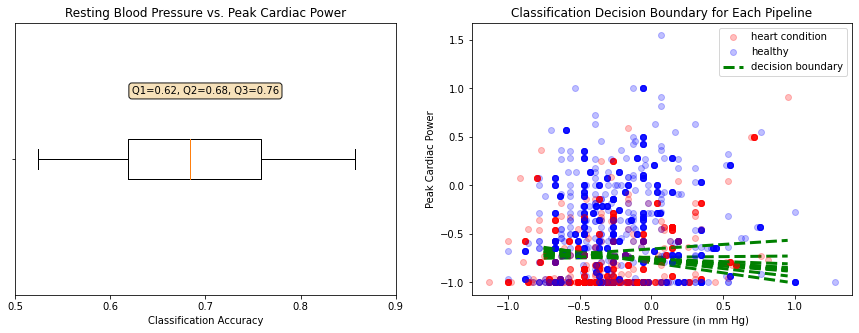

In [7]:
plt.figure(figsize=(15,5))

X = male_df[["trtbps", "pcp"]]
N_samples = X.shape[0]
y = male_df["output"]
idx = np.where(y==0)[0][0]
res_dict = cross_validate( pipeline, X, y, cv=kfold, scoring="accuracy", return_estimator=True )

plt.subplot(121)

plt.title( "Resting Blood Pressure vs. Peak Cardiac Power")
acc_vals = res_dict["test_score"]
plt.boxplot( acc_vals , labels=[""], vert=False )
plt.xlabel( "Classification Accuracy" )
plt.xticks( np.arange(0.5,1,0.1) )
rstr = "Q1={0:.2f}, Q2={1:0.2f}, Q3={2:0.2f}".format( np.quantile( acc_vals, 0.25), np.quantile( acc_vals, 0.5 ), np.quantile( acc_vals, 0.75 ) )
plt.text( 0.7, 1.25, rstr, horizontalalignment='center', verticalalignment='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9) )

plt.subplot(122)

for i in range(0, len(res_dict["estimator"])):
    T = res_dict["estimator"][i]["min_max_scaler"].transform( X )
    c = res_dict["estimator"][i]["logit_classifier"].intercept_[0]
    w = res_dict["estimator"][i]["logit_classifier"].coef_[0]
    b = -c/w[1]
    m = -w[0]/w[1]
    
    plt.plot( T[0:idx,0], T[0:idx,1], "ro", alpha=0.25 )
    plt.plot( T[idx:N_samples,0], T[idx:N_samples,1], "bo", alpha=0.25 )
    plt.xlabel('Resting Blood Pressure (in mm Hg)')
    plt.ylabel('Peak Cardiac Power')
    ticks = np.arange( -0.75, 1, 0.1 ).reshape( (-1,1) ) 
    plt.plot( ticks, ( ticks*m + b ), 'g--', lw=3 ) 
    
plt.legend( ["heart condition", "healthy", "decision boundary"] )
plt.title( "Classification Decision Boundary for Each Pipeline" )

plt.show()
